In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from PIL import Image
from matplotlib import pyplot
import cv2
import math

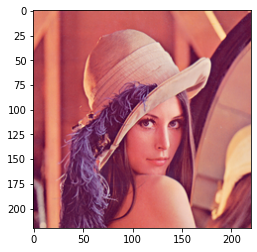

In [2]:
image = Image.open('../assets/Lena.png')
image_numpy = np.asarray(image)
pyplot.imshow(image_numpy)
pyplot.show()

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

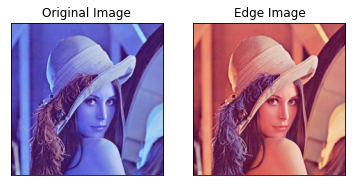

In [3]:
im = cv2.imread('../assets/Lena.png')
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)   # BGR -> RGB
pyplot.imshow(im)
plt.subplot(121),plt.imshow(im,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Gray Image'), ([], []), ([], []))

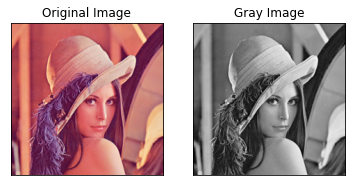

In [4]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray,cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])

To understand the edge detection we must understand the concept of convolution.  
![Convolution Diagram](../assets/convolution.png "convolution")  

In [11]:
# convolution
def convolve2D(grayImage, filter):
    num_rows = grayImage.shape[0]
    num_cols = grayImage.shape[1]
    filter_size = filter.shape[0]
    half_filter_size = math.floor(filter_size / 2)
    result = np.zeros( (num_rows, num_cols))
    for i in range(num_cols-filter_size + 1):
        for j in range(num_rows-filter_size + 1):
            sum = 0.0
            for k in range(filter_size):
                for l in range(filter_size):
                    sum = sum + filter[k, l] * grayImage[i+k, j+l]
            result[i + half_filter_size, j + half_filter_size] = sum
    return result


(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

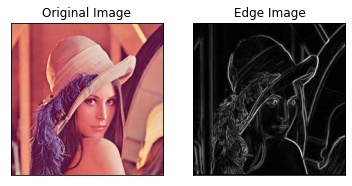

In [6]:
# Sobel
num_rows = image_numpy.shape[0]
num_cols = image_numpy.shape[1]
gx = convolve2D(gray, np.array([[1.0, 0.0, -1.0],[2.0, 0.0, -2.0],[1.0, 0.0, -1.0]]))
gy = convolve2D(gray, np.array([[1.0, 2.0, 1.0],[0.0, 0.0, 0.0],[-1.0, -2.0, -1.0]]))
sobel = np.power(np.power(gx, 2) + np.power(gy, 2), 0.5) / (256*math.sqrt(2))   # divide to normalize
#print(sobel)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobel,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

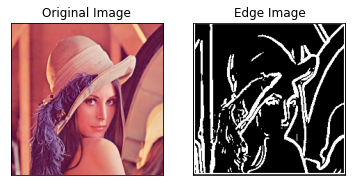

In [9]:
# Canny
smoothed = convolve2D(gray, (1/159)*np.array([[2.0, 4.0, 5.0, 4.0, 2.0],[4.0, 9.0, 12.0, 9.0, 4.0],[5.0, 12.0, 15.0, 12.0, 5.0], [2.0, 4.0, 5.0, 4.0, 2.0],[4.0, 9.0, 12.0, 9.0, 4.0]]))
gx = convolve2D(smoothed, np.array([[1.0, 0.0, -1.0],[2.0, 0.0, -2.0],[1.0, 0.0, -1.0]]))
gy = convolve2D(smoothed, np.array([[1.0, 2.0, 1.0],[0.0, 0.0, 0.0],[-1.0, -2.0, -1.0]]))
canny = np.power(np.power(gx, 2) + np.power(gy, 2), 0.5)
canny = (canny - np.min(canny))/np.ptp(canny)
threshold  = 0.1
canny = (canny > threshold)*np.ones(canny.shape)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

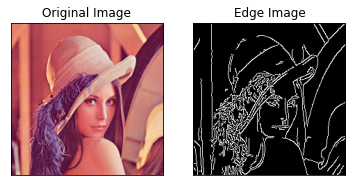

In [10]:
edges = cv2.Canny(gray,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel CV_8U'), ([], []), ([], []))

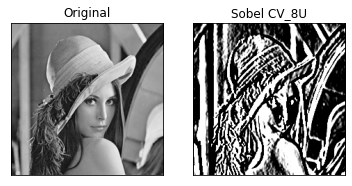

In [60]:
sobelx8u = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,2,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
